<a href="https://colab.research.google.com/github/roveen001/gfa/blob/main/gfa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Food Analysis on Staple Food Project
## Dashboard

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [149]:
# read all the necessary files
# meat production
meat_pn = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/global-meat-production.csv')
# wheat production
wheat_pn = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/wheat-production.csv')
# rice production
rice_pn = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/rice-production.csv')
# orange production
orange_pn = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/orange-production.csv')

In [150]:
# GDP 
gdp = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/annual-food-expenditure-per-person-vs-gdp-per-capita.csv' )

In [151]:
# Food pricing 
fp = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/global_food_prices.csv', low_memory=False)
fp

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0000,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0000,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0000,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0000,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,NaN


<Figure size 432x288 with 0 Axes>

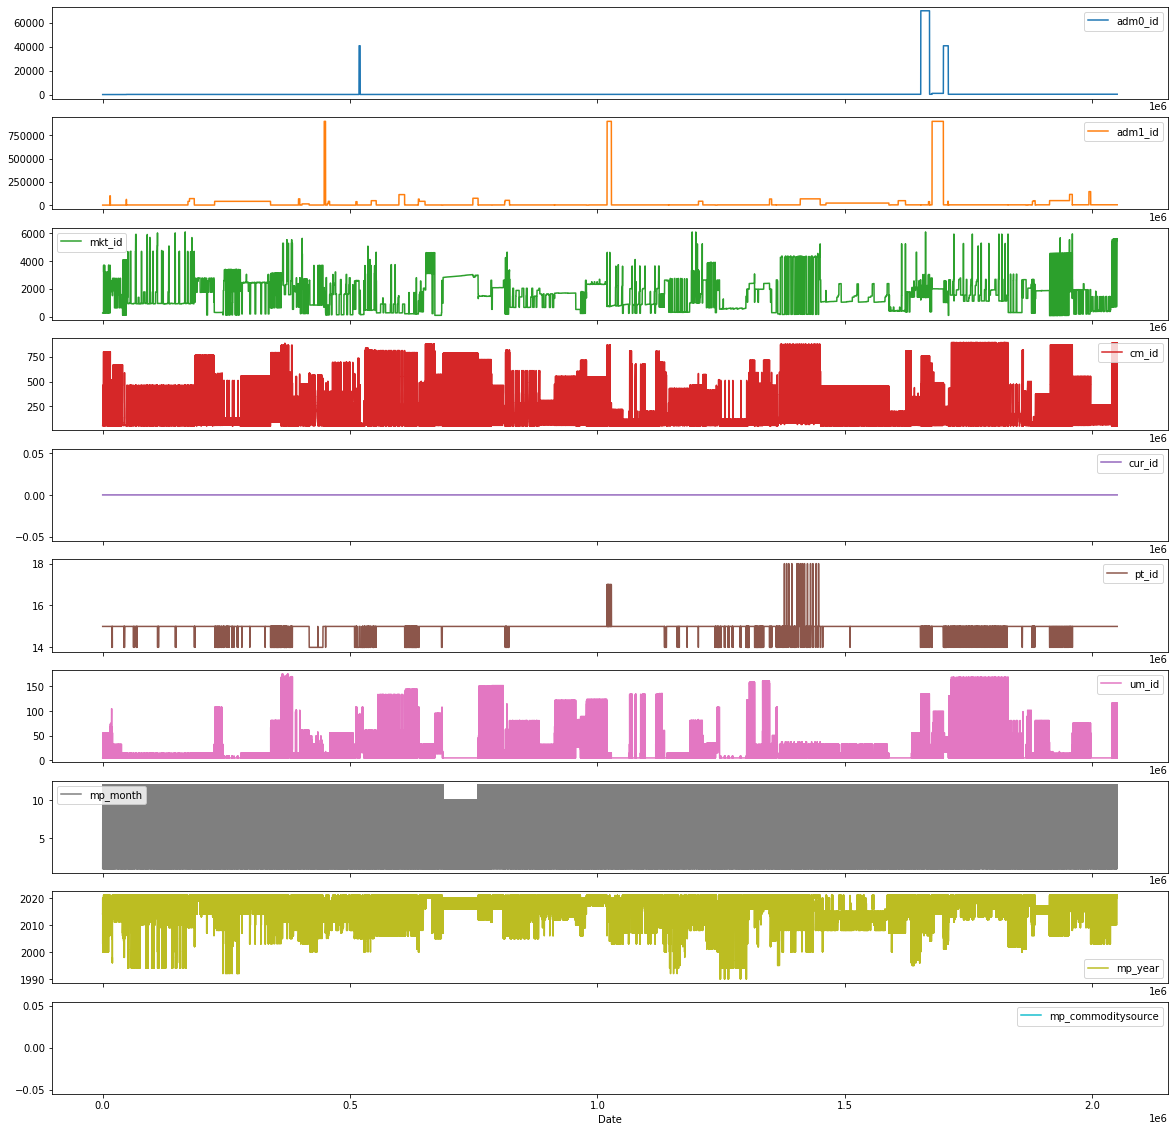

In [209]:
plt.figure()
fp.plot(subplots=True, figsize=(20,20))
plt.xlabel("Date");

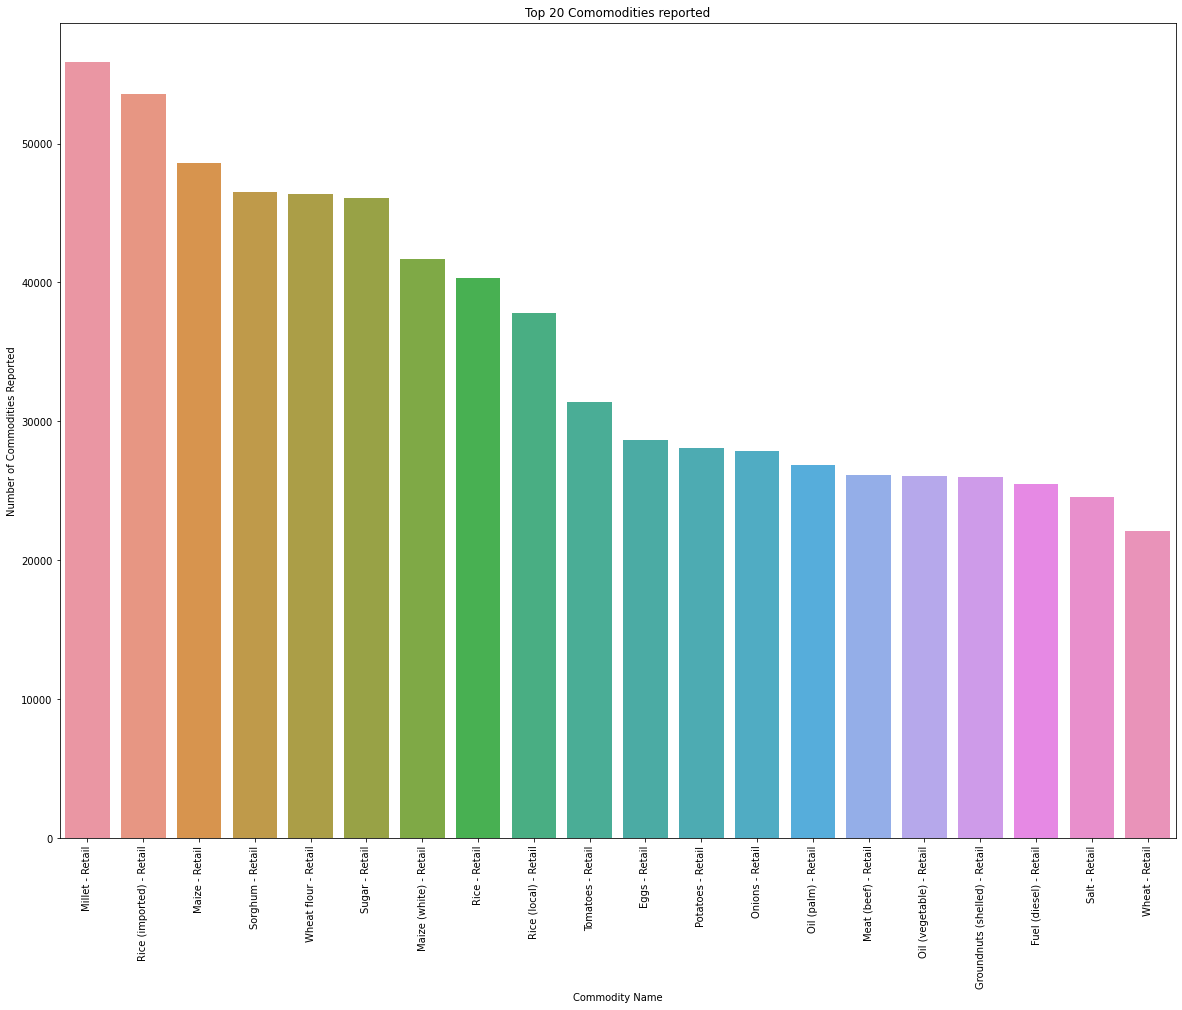

In [216]:
# Top 20 most reported commodites
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
top_20_df = fp[["adm0_id", "cm_name"]].groupby("cm_name").agg(['count'])["adm0_id"]['count'].sort_values(ascending=False)[:20]
fig = sns.barplot( x = top_20_df.index, y = top_20_df.values, ax=ax)
fig.set_xticklabels(labels=top_20_df.index , rotation=90)
fig.set_ylabel("Number of Commodities Reported")
fig.set_xlabel("Commodity Name")
fig.set_title("Top 20 Comomodities reported");

In [127]:
# get the dollar conversion rate
# Here we want to do this as to see all the currency values in lastest dollar values Available at: https://app.exchangerate-api.com/dashboard/confirmed
exc = pd.read_json('https://v6.exchangerate-api.com/v6/1474d2fba526317bbf9da694/latest/USD')
exc = exc['conversion_rates']
exc

AED      3.6725
AFN     89.2035
ALL    108.2977
AMD    395.0896
ANG      1.7900
         ...   
XPF    112.4424
YER    250.4778
ZAR     17.1744
ZMW     18.2468
ZWL    698.3225
Name: conversion_rates, Length: 162, dtype: float64

In [152]:
# convert the values to dollar
to_dollar = fp.apply(lambda x: '{:.2f}'.format(x['mp_price']*(1/exc[x['cur_name']]))if x['cur_name'] in exc else False,axis = 1)
to_dollar

0          0.56
1          0.56
2          0.56
3          0.56
4          0.56
           ... 
2050633    0.33
2050634    0.16
2050635    0.16
2050636    0.09
2050637    1.72
Length: 2050638, dtype: object

In [153]:
# update the dollar values to the column
fp['mp_price'] = to_dollar
fp

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,0.56,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,0.56,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,0.56,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,0.56,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,0.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,0.33,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,0.16,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,0.16,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,0.09,NaN


## Wheat

In [154]:
# lets get the price wheat r'\bwheat gmi'
wheat_pr = fp.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
wheat_pr = wheat_pr[wheat_pr['cm_name'].str.match('^Wheat.*') == True]
wheat_pr = wheat_pr.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
wheat_pr

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,adm0_name,cm_name,mp_year,mp_price
0,Afghanistan,Wheat - Retail,2000,0.10
1,Afghanistan,Wheat - Retail,2000,0.11
2,Afghanistan,Wheat - Retail,2000,0.12
3,Afghanistan,Wheat - Retail,2000,0.13
4,Afghanistan,Wheat - Retail,2000,0.14
...,...,...,...,...
18997,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.10
18998,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.18
18999,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.25
19000,Zimbabwe,Wheat flour (fortified) - Retail,2018,3.00


In [155]:
# finsh the table for wheat
wheat_pr = wheat_pr.merge(wheat_pn,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
wheat_pr = wheat_pr.merge(gdp,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])

In [118]:
wheat_pr

,adm0_name,cm_name,mp_year,mp_price,Wheat | 00000015 || Production | 005510 || tonnes_x,GDP per capita (current US$)_x,Population (historical estimates)_x,wheat_af,Entity_x,Code_x,...,Code_x,Year_x,Wheat | 00000015 || Production | 005510 || tonnes,Entity_y,Code_y,Year_y,GDP per capita (current US$),Food expenditure (USDA (2017))_y,Population (historical estimates),Continent_y
0,Afghanistan,Wheat - Retail,2000,0.10,1469000,NaN,19542986.0,NaN,Afghanistan,AFG,...,AFG,2000,1469000,Afghanistan,AFG,2000,NaN,NaN,19542986.0,NaN
1,Afghanistan,Wheat - Retail,2000,0.11,1469000,NaN,19542986.0,NaN,Afghanistan,AFG,...,AFG,2000,1469000,Afghanistan,AFG,2000,NaN,NaN,19542986.0,NaN
2,Afghanistan,Wheat - Retail,2000,0.12,1469000,NaN,19542986.0,NaN,Afghanistan,AFG,...,AFG,2000,1469000,Afghanistan,AFG,2000,NaN,NaN,19542986.0,NaN
3,Afghanistan,Wheat - Retail,2000,0.13,1469000,NaN,19542986.0,NaN,Afghanistan,AFG,...,AFG,2000,1469000,Afghanistan,AFG,2000,NaN,NaN,19542986.0,NaN
4,Afghanistan,Wheat - Retail,2000,0.14,1469000,NaN,19542986.0,NaN,Afghanistan,AFG,...,AFG,2000,1469000,Afghanistan,AFG,2000,NaN,NaN,19542986.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12609,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.10,45000,1254.642212,15052191.0,199.842478,Zimbabwe,ZWE,...,ZWE,2018,45000,Zimbabwe,ZWE,2018,1254.642212,NaN,15052191.0,NaN
12610,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.18,45000,1254.642212,15052191.0,192.508809,Zimbabwe,ZWE,...,ZWE,2018,45000,Zimbabwe,ZWE,2018,1254.642212,NaN,15052191.0,NaN
12611,Zimbabwe,Wheat flour (fortified) - Retail,2018,2.25,45000,1254.642212,15052191.0,186.519647,Zimbabwe,ZWE,...,ZWE,2018,45000,Zimbabwe,ZWE,2018,1254.642212,NaN,15052191.0,NaN
12612,Zimbabwe,Wheat flour (fortified) - Retail,2018,3.00,45000,1254.642212,15052191.0,139.889735,Zimbabwe,ZWE,...,ZWE,2018,45000,Zimbabwe,ZWE,2018,1254.642212,NaN,15052191.0,NaN


In [156]:
# insert new column
wheat_pr['wheat_af'] = (((wheat_pr['Wheat | 00000015 || Production | 005510 || tonnes'])/wheat_pr['Population (historical estimates)'] * wheat_pr['mp_price'])/ wheat_pr['GDP per capita (current US$)']) *1000
wheat_pr = wheat_pr.drop(columns=['Entity_x','Code_x','Year_x','Entity_y','Code_y','Year_y','Food expenditure (USDA (2017))','Continent'])

## Rice

In [157]:
# lets get the price rice 'r`\bwheat`gmi'
rice_pr = fp.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
rice_pr = rice_pr[rice_pr['cm_name'].str.match('^Rice.*') == True]
rice_pr = rice_pr.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
rice_pr

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,adm0_name,cm_name,mp_year,mp_price
0,Afghanistan,Rice (high quality) - Retail,2020,0.78
1,Afghanistan,Rice (high quality) - Retail,2020,0.81
2,Afghanistan,Rice (high quality) - Retail,2020,0.82
3,Afghanistan,Rice (high quality) - Retail,2020,0.83
4,Afghanistan,Rice (high quality) - Retail,2020,0.84
...,...,...,...,...
49493,Zimbabwe,Rice - Retail,2021,0.19
49494,Zimbabwe,Rice - Retail,2021,0.20
49495,Zimbabwe,Rice - Retail,2021,0.21
49496,Zimbabwe,Rice - Retail,2021,0.22


In [158]:
rice_pr=rice_pr.merge(rice_pn,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
rice_pr = rice_pr.merge(gdp,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
rice_pr

,adm0_name,cm_name,mp_year,mp_price,Entity_x,Code_x,Year_x,Rice | 00000027 || Production | 005510 || tonnes,Entity_y,Code_y,Year_y,GDP per capita (current US$),Food expenditure (USDA (2017)),Population (historical estimates),Continent
0,Afghanistan,Rice (high quality) - Retail,2020,0.78,Afghanistan,AFG,2020,439549,Afghanistan,AFG,2020,516.747864,NaN,38972236.0,NaN
1,Afghanistan,Rice (high quality) - Retail,2020,0.81,Afghanistan,AFG,2020,439549,Afghanistan,AFG,2020,516.747864,NaN,38972236.0,NaN
2,Afghanistan,Rice (high quality) - Retail,2020,0.82,Afghanistan,AFG,2020,439549,Afghanistan,AFG,2020,516.747864,NaN,38972236.0,NaN
3,Afghanistan,Rice (high quality) - Retail,2020,0.83,Afghanistan,AFG,2020,439549,Afghanistan,AFG,2020,516.747864,NaN,38972236.0,NaN
4,Afghanistan,Rice (high quality) - Retail,2020,0.84,Afghanistan,AFG,2020,439549,Afghanistan,AFG,2020,516.747864,NaN,38972236.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37026,Zimbabwe,Rice - Retail,2020,0.16,Zimbabwe,ZWE,2020,1336,Zimbabwe,ZWE,2020,1214.509766,NaN,15669663.0,NaN
37027,Zimbabwe,Rice - Retail,2020,0.17,Zimbabwe,ZWE,2020,1336,Zimbabwe,ZWE,2020,1214.509766,NaN,15669663.0,NaN
37028,Zimbabwe,Rice - Retail,2020,0.18,Zimbabwe,ZWE,2020,1336,Zimbabwe,ZWE,2020,1214.509766,NaN,15669663.0,NaN
37029,Zimbabwe,Rice - Retail,2020,0.19,Zimbabwe,ZWE,2020,1336,Zimbabwe,ZWE,2020,1214.509766,NaN,15669663.0,NaN


In [159]:
rice_pr['rice_af'] = (((rice_pr['Rice | 00000027 || Production | 005510 || tonnes'])/rice_pr['Population (historical estimates)'] * rice_pr['mp_price'])/ rice_pr['GDP per capita (current US$)']) *1000
rice_pr = rice_pr.drop(columns=['Entity_x','Code_x','Year_x','Entity_y','Code_y','Year_y','Food expenditure (USDA (2017))','Continent'])

## Meat 

In [160]:
# lets get the price meat 'r`\bwheat`gmi'
meat_pr = fp.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
meat_pr = meat_pr[meat_pr['cm_name'].str.match('^Meat.*') == True]
meat_pr = meat_pr.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
meat_pr

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,adm0_name,cm_name,mp_year,mp_price
0,Algeria,Meat (beef) - Retail,2015,8.73
1,Algeria,Meat (camel) - Retail,2015,4.00
2,Algeria,Meat (camel) - Retail,2015,4.37
3,Algeria,Meat (camel) - Retail,2015,4.73
4,Algeria,Meat (camel) - Retail,2015,5.09
...,...,...,...,...
33827,Yemen,Meat (mutton) - Retail,2020,21.96
33828,Yemen,Meat (mutton) - Retail,2020,22.79
33829,Yemen,Meat (mutton) - Retail,2020,23.87
33830,Yemen,Meat (mutton) - Retail,2020,24.12


In [161]:
meat_pr = meat_pr.merge(meat_pn,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
meat_pr = meat_pr.merge(gdp,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
meat_pr

,adm0_name,cm_name,mp_year,mp_price,Entity_x,Code_x,Year_x,"Meat, total | 00001765 || Production | 005510 || tonnes",Entity_y,Code_y,Year_y,GDP per capita (current US$),Food expenditure (USDA (2017)),Population (historical estimates),Continent
0,Algeria,Meat (beef) - Retail,2015,8.73,Algeria,DZA,2015,771661,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
1,Algeria,Meat (camel) - Retail,2015,4.00,Algeria,DZA,2015,771661,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
2,Algeria,Meat (camel) - Retail,2015,4.37,Algeria,DZA,2015,771661,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
3,Algeria,Meat (camel) - Retail,2015,4.73,Algeria,DZA,2015,771661,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
4,Algeria,Meat (camel) - Retail,2015,5.09,Algeria,DZA,2015,771661,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25251,Yemen,Meat (mutton) - Retail,2020,21.96,Yemen,YEM,2020,417391,Yemen,YEM,2020,NaN,NaN,32284044.0,NaN
25252,Yemen,Meat (mutton) - Retail,2020,22.79,Yemen,YEM,2020,417391,Yemen,YEM,2020,NaN,NaN,32284044.0,NaN
25253,Yemen,Meat (mutton) - Retail,2020,23.87,Yemen,YEM,2020,417391,Yemen,YEM,2020,NaN,NaN,32284044.0,NaN
25254,Yemen,Meat (mutton) - Retail,2020,24.12,Yemen,YEM,2020,417391,Yemen,YEM,2020,NaN,NaN,32284044.0,NaN


In [162]:
meat_pr['meat_af'] = (((meat_pr['Meat, total | 00001765 || Production | 005510 || tonnes'])/meat_pr['Population (historical estimates)'] * meat_pr['mp_price'])/ meat_pr['GDP per capita (current US$)']) *1000
meat_pr = meat_pr.drop(columns=['Entity_x','Code_x','Year_x','Entity_y','Code_y','Year_y','Food expenditure (USDA (2017))','Continent'])

## Orange

In [163]:
# lets get the orange price 'r`\bwheat`gmi'
orange_pr = fp.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
orange_pr = orange_pr[orange_pr['cm_name'].str.match('^Orange.*') == True]
orange_pr = orange_pr.groupby(['adm0_name','cm_name','mp_year','mp_price'],as_index=False)['mp_price'].mean()
orange_pr

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



,adm0_name,cm_name,mp_year,mp_price
0,Algeria,Oranges - Retail,2015,1.02
1,Algeria,Oranges - Retail,2015,1.29
2,Algeria,Oranges - Retail,2015,1.46
3,Algeria,Oranges - Retail,2015,1.82
4,Benin,Oranges - Retail,2019,0.06
...,...,...,...,...
1522,Turkey,Oranges - Retail,2021,0.35
1523,Turkey,Oranges - Retail,2021,0.36
1524,Turkey,Oranges - Retail,2021,0.37
1525,Turkey,Oranges - Retail,2021,0.38


In [164]:
orange_pr = orange_pr.merge(orange_pn,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
orange_pr = orange_pr.merge(gdp,left_on=['adm0_name','mp_year'],right_on=['Entity','Year'])
orange_pr

,adm0_name,cm_name,mp_year,mp_price,Entity_x,Code_x,Year_x,Oranges | 00000490 || Production | 005510 || tonnes,Entity_y,Code_y,Year_y,GDP per capita (current US$),Food expenditure (USDA (2017)),Population (historical estimates),Continent
0,Algeria,Oranges - Retail,2015,1.02,Algeria,DZA,2015,1005079,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
1,Algeria,Oranges - Retail,2015,1.29,Algeria,DZA,2015,1005079,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
2,Algeria,Oranges - Retail,2015,1.46,Algeria,DZA,2015,1005079,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
3,Algeria,Oranges - Retail,2015,1.82,Algeria,DZA,2015,1005079,Algeria,DZA,2015,4177.889648,724.0,39543148.0,Africa
4,Benin,Oranges - Retail,2019,0.06,Benin,BEN,2019,14859,Benin,BEN,2019,1219.515503,NaN,12290443.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Turkey,Oranges - Retail,2020,0.35,Turkey,TUR,2020,1333975,Turkey,TUR,2020,8536.433594,NaN,84135432.0,NaN
1023,Turkey,Oranges - Retail,2020,0.37,Turkey,TUR,2020,1333975,Turkey,TUR,2020,8536.433594,NaN,84135432.0,NaN
1024,Turkey,Oranges - Retail,2020,0.38,Turkey,TUR,2020,1333975,Turkey,TUR,2020,8536.433594,NaN,84135432.0,NaN
1025,Turkey,Oranges - Retail,2020,0.41,Turkey,TUR,2020,1333975,Turkey,TUR,2020,8536.433594,NaN,84135432.0,NaN


In [165]:
orange_pr['orange_af'] = (((orange_pr['Oranges | 00000490 || Production | 005510 || tonnes'])/orange_pr['Population (historical estimates)'] * orange_pr['mp_price'])/ orange_pr['GDP per capita (current US$)']) *1000
orange_pr = orange_pr.drop(columns=['Entity_x','Code_x','Year_x','Entity_y','Code_y','Year_y','Food expenditure (USDA (2017))','Continent'])

## Affordibility

In [166]:
# lets define the class that holds the name of the countries we are interesed in
countries = {0:'Nepal',
             1:'Colombia',
             2:'Turkey',
             3:'Ethopita',
             4:'Jordan',
             5:'Mali',
             6:'Nigeria',
             7:'Rowanda',
             8:'State of Palestine'}
ser = pd.Series(data=countries)

In [231]:
# create a df to hold the data that we need using concat
ft = pd.concat([wheat_pr,rice_pr, meat_pr, orange_pr],ignore_index=True)
ft = ft.loc[ft.adm0_name.isin(ser)]
ft

,adm0_name,cm_name,mp_year,mp_price,Wheat | 00000015 || Production | 005510 || tonnes,GDP per capita (current US$),Population (historical estimates),wheat_af,Rice | 00000027 || Production | 005510 || tonnes,rice_af,"Meat, total | 00001765 || Production | 005510 || tonnes",meat_af,Oranges | 00000490 || Production | 005510 || tonnes,orange_af
2937,Colombia,Wheat - Wholesale,2020,1.17,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
2938,Colombia,Wheat - Wholesale,2020,1.18,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
2939,Colombia,Wheat - Wholesale,2020,1.19,6295.0,5334.556152,50930656.0,0.000028,NaN,NaN,NaN,NaN,NaN,NaN
2940,Colombia,Wheat - Wholesale,2020,1.34,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
2941,Colombia,Wheat - Wholesale,2020,1.35,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75923,Turkey,Oranges - Retail,2020,0.35,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000650
75924,Turkey,Oranges - Retail,2020,0.37,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000687
75925,Turkey,Oranges - Retail,2020,0.38,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000706
75926,Turkey,Oranges - Retail,2020,0.41,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000762


In [232]:
# export the csv file 
ft = ft.rename(columns={'adm0_name':'country','mp_year':'year','mp_price':'price','Population (historical estimates)':'pop','Wheat | 00000015 || Production | 005510 || tonnes':'wheat_p','GDP per capita (current US$)':'gdp','Rice | 00000027 || Production | 005510 || tonnes':'rice_p','Meat, total | 00001765 || Production | 005510 || tonnes':'meat_p','Oranges | 00000490 || Production | 005510 || tonnes':'orange_p'})
ft.to_csv('drive/MyDrive/Colab Notebooks/gfa/final_tb.csv')

In [233]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/gfa/final_tb.csv')
df

,Unnamed: 0,country,cm_name,year,price,wheat_p,gdp,pop,wheat_af,rice_p,rice_af,meat_p,meat_af,orange_p,orange_af
0,2937,Colombia,Wheat - Wholesale,2020,1.17,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
1,2938,Colombia,Wheat - Wholesale,2020,1.18,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
2,2939,Colombia,Wheat - Wholesale,2020,1.19,6295.0,5334.556152,50930656.0,0.000028,NaN,NaN,NaN,NaN,NaN,NaN
3,2940,Colombia,Wheat - Wholesale,2020,1.34,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
4,2941,Colombia,Wheat - Wholesale,2020,1.35,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,75923,Turkey,Oranges - Retail,2020,0.35,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000650
9425,75924,Turkey,Oranges - Retail,2020,0.37,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000687
9426,75925,Turkey,Oranges - Retail,2020,0.38,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000706
9427,75926,Turkey,Oranges - Retail,2020,0.41,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000762


### Working with dashboard



In [218]:
import plotly.express as px

In [219]:
# wheat affordibility
w_pr = wheat_pr.loc[wheat_pr.adm0_name.isin(ser)]
fig_w = px.scatter(
    w_pr,
    x ='mp_year', 
    y='wheat_af', 
    color='adm0_name',
    hover_name='cm_name',
    size = 'mp_price',
    size_max=50
)
fig_w.show()

In [220]:
# rice affordibility
r_pr = rice_pr.loc[rice_pr.adm0_name.isin(ser)]
fig_r = px.scatter(
    r_pr,
    x ='mp_year', 
    y='rice_af', 
    color='adm0_name',
    hover_name='cm_name',
    size = 'mp_price',
    size_max=50
)
fig_r.show()

In [223]:
# meat affordibility
m_pr = meat_pr.loc[meat_pr.adm0_name.isin(ser)]
fig_m = px.scatter(
    m_pr,
    x ='mp_year', 
    y='meat_af', 
    color='adm0_name',
    hover_name='cm_name',
    size = 'mp_price',
    size_max=20
)
fig_m.show()

In [225]:
# orange affordibility
o_pr = orange_pr.loc[orange_pr.adm0_name.isin(ser)]
fig_o = px.scatter(
    o_pr,
    x ='mp_year', 
    y='orange_af', 
    color='adm0_name',
    hover_name='cm_name',
    size = 'mp_price',
    size_max=20
)
fig_o.show()

In [239]:
df

,Unnamed: 0,country,cm_name,year,price,wheat_p,gdp,pop,wheat_af,rice_p,rice_af,meat_p,meat_af,orange_p,orange_af
0,2937,Colombia,Wheat - Wholesale,2020,1.17,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
1,2938,Colombia,Wheat - Wholesale,2020,1.18,6295.0,5334.556152,50930656.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN
2,2939,Colombia,Wheat - Wholesale,2020,1.19,6295.0,5334.556152,50930656.0,0.000028,NaN,NaN,NaN,NaN,NaN,NaN
3,2940,Colombia,Wheat - Wholesale,2020,1.34,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
4,2941,Colombia,Wheat - Wholesale,2020,1.35,6295.0,5334.556152,50930656.0,0.000031,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,75923,Turkey,Oranges - Retail,2020,0.35,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000650
9425,75924,Turkey,Oranges - Retail,2020,0.37,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000687
9426,75925,Turkey,Oranges - Retail,2020,0.38,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000706
9427,75926,Turkey,Oranges - Retail,2020,0.41,NaN,8536.433594,84135432.0,NaN,NaN,NaN,NaN,NaN,1333975.0,0.000762


In [264]:
#pricing in the countries
fig_costing = px.sunburst(df, path=['country','year','cm_name'], values='price',
                  color='price', hover_data=['cm_name'])
fig_costing.show()

In [256]:
#affortability vs pricing 
fig_index = px.scatter(
    df,
    x ='price', 
    y=['wheat_af','rice_af','meat_af','orange_af'],
    color='year',
    hover_name='cm_name',
    size = 'price',
    size_max=300,
    log_x=True,
)
fig_index.show()

In [ ]:
# %pip install dash

In [44]:
# from jupyter_dash import JupyterDash  # pip install dash
import plotly.express as px
import dash_html_components as html
import dash_core_components as dcc
import dash

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']


<ipython-input-44-58af895ab351>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-44-58af895ab351>:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [225]:
## couldn't run the server not in colab even not in the jyputer lab,
## 

In [265]:
# Initialise the app
app = dash.Dash(__name__)

# Define the app
app.layout = html.Div()

In [266]:
app.layout = html.Div(
    [   
        html.Div(
            [
                dcc.Graph(figure=fig_w)
            ]
        ),
        html.Div(
            [
                dcc.Graph(figure=fig_r)
            ]
        ),
        html.Div(
            [
                dcc.Graph(figure=fig_m)
            ]
        ),
        html.Div(
            [
                dcc.Graph(figure=fig_o)
            ]
        ),
        # Placeholder for the final chart.
        html.Div(dcc.Graph(id="affordibity-vs-products"), className="chart"),
    ],
)

In [267]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
